# Importar Librerias

In [16]:
# Librerias de Python
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option("display.max_columns", None) # MUESTRA TODAS LAS COLUNAS DE UN PANDAS DATAFRAME
warnings.filterwarnings('ignore')

In [50]:
df_internet = pd.read_csv('Datasets/internet.csv', sep=';')
df_internet.head()

,Año,Trimestre,Provincia,+ 0 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,Accesos por cada 100 hab,Accesos por cada 100 hogares,Mbps (Media de bajada)
0,2021,4,Buenos Aires,733089,297296,196021,3259793,22958.0,4509157,25,75.66,60
1,2021,4,Capital Federal,131290,66135,66755,1147939,0.0,1412119,46,111.27,83
2,2021,4,Catamarca,13964,9804,3262,29827,2233.0,59090,14,55.25,46
3,2021,4,Chaco,42096,21937,13692,58435,7585.0,143745,12,44.05,42
4,2021,4,Chubut,104686,31175,5780,2904,15763.0,160308,25,82.57,9


# CALIDAD DEL SERVICIO VELOCIDAD

Analisis por acceso por internet fijo por año

<function matplotlib.pyplot.show(close=None, block=None)>

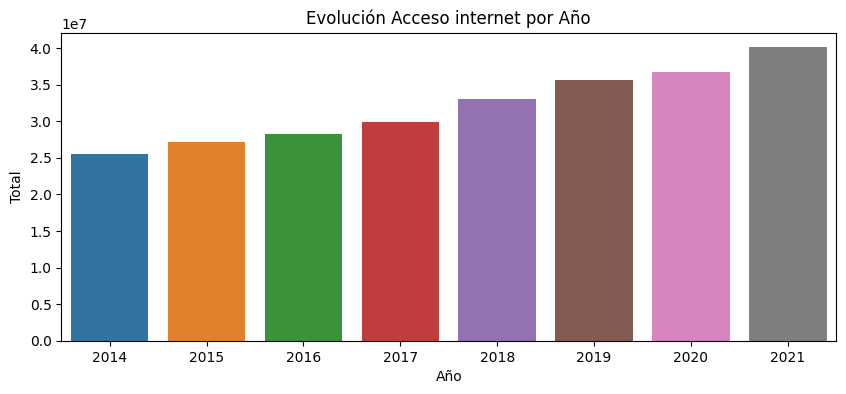

In [64]:
# Agrupando por Año
df_anio = df_internet.groupby(['Año'])['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

# Analisis por acceso por internet fijo
plt.figure(figsize=(10,4))
sns.barplot(x="Año", y="Total", data=df_anio)
plt.title('Evolución Acceso internet por Año')
plt.xlabel('Año')

plt.show

Se hizo un analisis solo hasta el 2021, porque el periodo 2022 estaba incompleto hasta el 3 trimestre, en otros casos hasta el 1 bimestre.

Observamos el acceso a internet fijo cada va aumentado año, es decir la gente va solicitando cada vez mas el servico de internet.

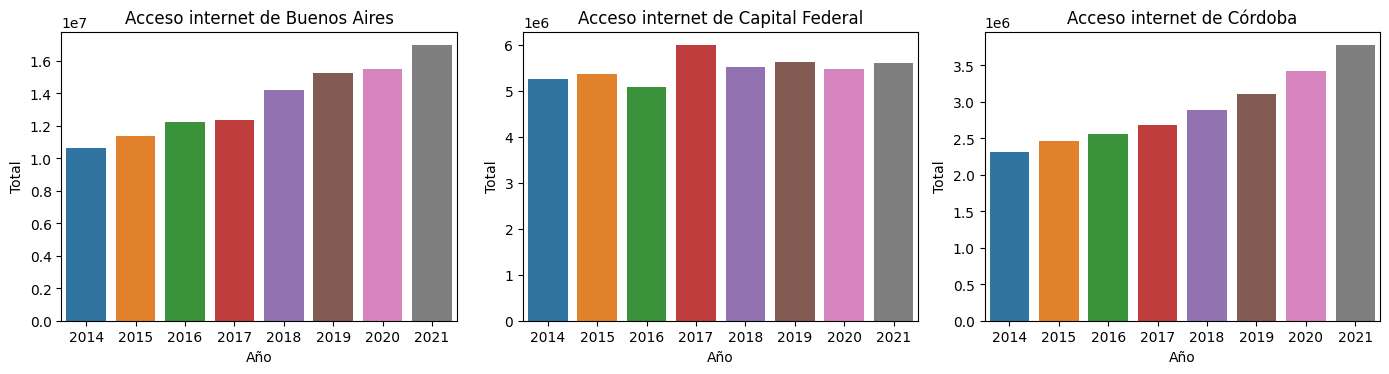

In [66]:
# Listando las 4 primeras provincias
df_provincia_solo = df_internet.groupby(['Provincia'])['Total'].sum().reset_index().sort_values(by='Total', ascending=False)
provincias = list(df_provincia_solo['Provincia'].head(3))

# Agrupando por Año y Provincia
df_provincia = df_internet.groupby(['Año', 'Provincia'])['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax = ax.flatten()

for i, provincia in enumerate(provincias):
    sns.barplot(data=df_provincia[df_provincia['Provincia'] == provincia], x="Año", y="Total", ax=ax[i])
    ax[i].set_xlabel('Año')
    ax[i].set_title('Acceso internet de '+ provincia)
    
# Ajustar subplots
plt.tight_layout()
plt.show()

Solo analizando las 3 provincias que tienen mas acceso.

En el caso de Provincia de Buenos Aires, cada año hubo aumento considerable del servicio de internet.

En el caso de Provincia de Capita Federal, en el 2017 hubo mayor cantidad de acceso de internet, hubo un estancamiento en el servicio.

En cambio en la Provincia de Cordova, hubo un aumento de acceso a internet cada año.

<function matplotlib.pyplot.show(close=None, block=None)>

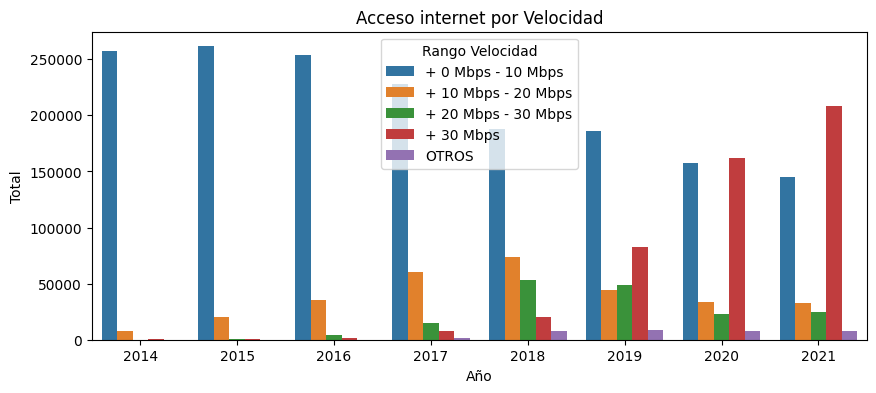

In [69]:
# Agrupando por Rango de Velocidad
df_velocidad = df_internet[['Año', '+ 0 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']]
df_velocidad =df_velocidad.melt(id_vars=['Año'], 
        var_name="Rango Velocidad", 
        value_name="Total").reset_index(drop=True)

# Analisis por acceso por internet fijo
plt.figure(figsize=(10,4))
sns.barplot(x="Año", y="Total", data=df_velocidad, hue='Rango Velocidad', ci=None)
plt.title('Acceso internet por Velocidad')
plt.xlabel('Año')

plt.show

Observamos que desde 2014 hasta 2019, la velocidad mas usado fue de hasta 10 Mbps. 

Pero el 2021 aumento considerablemente el internet de mas de 30 Mbps, esto se debe el abaratamiento del costo del servicio de internet. Por la tanto al tendencia es ofrecer el internet de mas de 30 Mbps

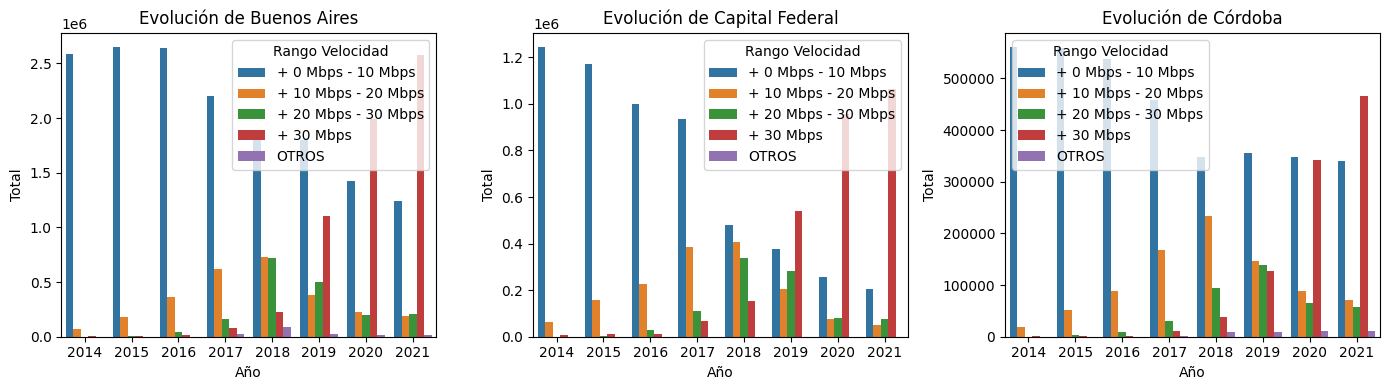

In [71]:
# Agrupando por Rango de Velocidad
df_velocidad = df_internet[['Año', 'Provincia', '+ 0 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']]
df_velocidad =df_velocidad.melt(id_vars=['Año', 'Provincia'], 
        var_name="Rango Velocidad", 
        value_name="Total").reset_index(drop=True)

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax = ax.flatten()

for i, provincia in enumerate(provincias):
    sns.barplot(data=df_velocidad[df_velocidad['Provincia'] == provincia], x="Año", y="Total", ax=ax[i], hue='Rango Velocidad', ci=None)
    ax[i].set_xlabel('Año')
    ax[i].set_title('Evolución de '+ provincia)
    
# Ajustar subplots
plt.tight_layout()
plt.show()

Observamos en las ciudades que tienen mas acceso a internet, la tendencia es que la velocidad debe ser mayor a 30 Mbps, como se dijo es porque es debido a la disminucion del costo del internet.

# PENETRACION DEL INTERNET FIJO

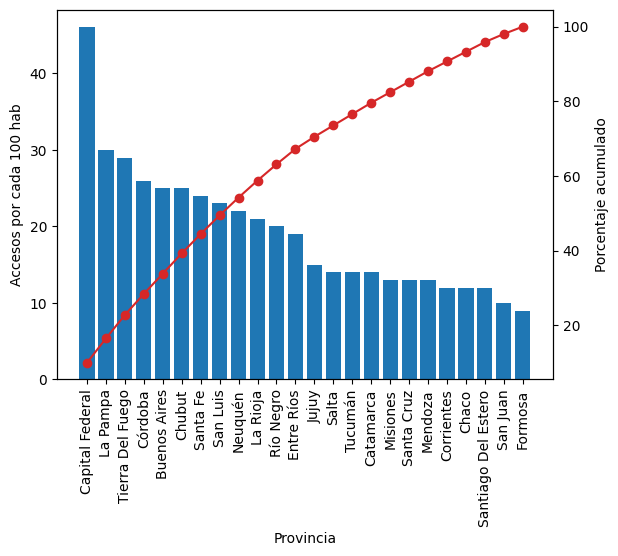

In [63]:
# Filtrar el dataframe ultimo periodo
df_acceso  = df_internet[(df_internet['Año'] == 2021) & (df_internet['Trimestre'] == 4)]

# Ordenar
df_acceso = df_acceso.sort_values('Accesos por cada 100 hab', ascending=False)

# Hallar porcentaje acumulado
df_acceso['Porcentaje acumulado'] = (df_acceso['Accesos por cada 100 hab'].cumsum() / df_acceso['Accesos por cada 100 hab'].sum()) * 100

# Gráfico de Pareto
fig, ax1 = plt.subplots()

# Barras para los accesos por cada 100 habitantes
ax1.bar(df_acceso['Provincia'], df_acceso['Accesos por cada 100 hab'], color='tab:blue')
ax1.set_xlabel('Provincia')
ax1.set_ylabel('Accesos por cada 100 hab')
ax1.tick_params(axis='y')

# Porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(df_acceso['Provincia'], df_acceso['Porcentaje acumulado'], color='tab:red', marker='o')
ax2.set_ylabel('Porcentaje acumulado')
ax2.tick_params(axis='y')

# Rotar las etiquetas del eje x
ax1.set_xticklabels(df_acceso['Provincia'], rotation=90)

# Mostrar
plt.show()

De acuerdo al porcentaje acumulado en algunas provincias tiene mas del 60% del servicio internet. Por lo tanto no es recomendable contratar un nuevo proveedor de servio de internet

Pero en algunas provincias tenemos menos del 30% del servio de internet, por lo que es un oportunidad aprovechar ese mercado. Tenemos como ejemplo las provincias de Misiones, Santa Fruz, Mendoza, Corrientes, Chaco, Santiago del Estero, San Juan y Formosa.

Text(0.5, 1.0, 'Accesos por cada 100 hogares')

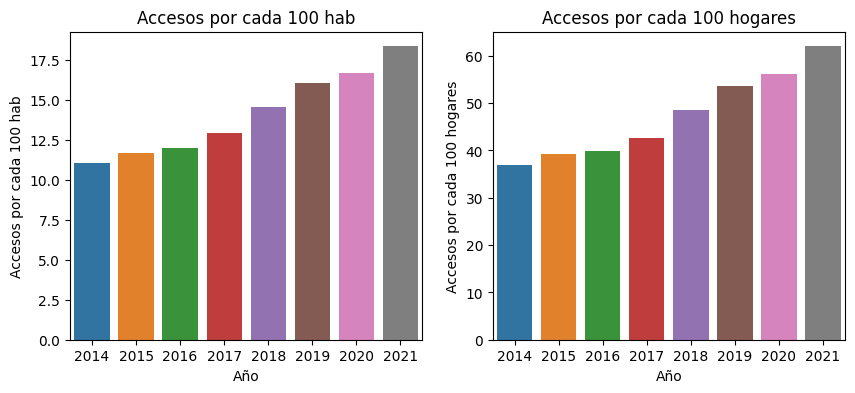

In [124]:
# Agrupando por Anio
df_anio = df_internet.groupby(['Año'])['Accesos por cada 100 hab', 'Accesos por cada 100 hogares'].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(data=df_anio, x="Año", y="Accesos por cada 100 hab", ax=ax[0], ci=None)
ax[0].set_xlabel('Año')
ax[0].set_title('Accesos por cada 100 hab')

sns.barplot(data=df_anio, x="Año", y="Accesos por cada 100 hogares", ax=ax[1], ci=None)
ax[1].set_xlabel('Año')
ax[1].set_title('Accesos por cada 100 hogares')

Observamos que tantao el Acceso por Cada 100 habitantes, esta en correlacion con Acceso por cada 100 hogares.

# KPI INDICADORES

## Acceso por cada 100 habitantes
Indicador utilizado más ampliamente para comparar la penetración del servicio telefónico.

Formula = Líneas principales por habitante / población * 100

## Acceso por cada 100 hogares
Indicador utilizado más ampliamente para comparar la penetración del servicio de internet

Formula = Líneas internet por hogar / población hogares * 100

## Velocidad promedio de bajada de internet fijo

Hasta el tercer trimestre de 2017 los operadores del servicio de Internet fijo reportaban a ENACOM (antes AFTIC y CNC) el número de accesos entre los siguientes rangos de velocidad:

Hasta 512 kbps
Entre 512 kbps y 1 Mbps
Entre 1 Mbps y 6 Mbps
Entre 6 Mbps y 10 Mbps
Entre 10 Mbps y 20 Mbps
Entre 20 Mbps y 30 Mbps
Más de 30 Mbps
 
Velociad Promedio de bajada de Internet fijo  = (0,512*AR1 + 0,7512*AR2 + 3,5*AR3 + 8*AR4 + 15*AR5 + 25*AR6 + 30*AR7)/Total de accesos reportados 

Donde AR1 es el total de accesos reportados para el primer rango (Hasta 512 kbps); AR2 es el total de accesos reportados para el segundo rango (Entre 512 kbps y 1 Mbps) y así sucesivamente.

En argentina con respecto al servicio de datos en redes de acceso fijas, la velocidad de transferencia de datos de bajada debe ser mayor al 60% de la velocidad de transferencia nominal.
Aclaración sobre el cálculo de la velocidad promedio de bajada de Internet fijo en Argentina